In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
education = pd.read_csv('education_all.csv')
crime = pd.read_csv('crime_all.csv')

education.reset_index(inplace=True)
crime.reset_index(inplace=True)

In [3]:
education.head()

,index,State,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,2000,3.107050e+10,557767814,177881580,667976456,328403457,3792096590,370882855,288895735,...,133366735.0,583465744,2484215057,255609306,91491401.0,641092965,569577741,257981746,530100703,86526320.0
1,1,2001,7.125435e+10,1205096441,227988480,1990909460,618218324,7895473833,1061188114,703315579,...,296723889.0,1326565262,4760220857,510599570,253879970.0,1564714192,1253035444,520774265,1205201789,152676575.0
2,2,2002,8.240055e+10,1387975241,260180178,2520137525,733650835,9092121808,1238777106,825970250,...,342344861.0,1514613174,5638643478,594855398,276976033.0,1772711389,1501299011,593509323,1357291868,182179355.0
3,3,2003,9.260448e+10,1584581070,280079667,3103945066,829601733,9928105199,1416997560,908683240,...,373160375.0,1705965593,6541541039,674510076,304548823.0,1952288975,1663743593,677382817,1511374487,211058170.0
4,4,2004,1.010000e+11,1672101861,299103691,4312713049,888970231,10825485264,1665593582,965299387,...,375611344.0,1895812898,7207764023,762450195,318894589.0,2122509463,1780464671,714586624,1613726426,258093648.0


In [4]:
crime.head()

,index,State,ALABAMA,ALASKA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,DELAWARE,...,SOUTH DAKOTA,TENNESSEE,TEXAS,UTAH,VERMONT,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING
0,0,2000,202159,26641,299092,110019,1266714,171304,110091,35090,...,17511,278218,1033311,99958,18185,214348,300932,47067,172124,16285
1,1,2001,192835,26895,322549,111296,1346557,186379,106791,32267,...,17644,295770,1098809,96307,16978,228445,308492,46120,179410,17392
2,2,2002,200331,27745,348467,112672,1384872,195936,103719,31803,...,17342,290961,1130292,103129,15600,229039,309931,45320,176987,17858
3,3,2003,201572,28130,342973,111141,1420637,195046,101537,33046,...,16624,296010,1138623,105207,14303,220106,312820,47375,169842,17962
4,4,2004,201664,26331,335699,124201,1425264,197527,102078,30992,...,16227,295147,1132256,103246,15039,220227,322167,50421,158258,18052


In [5]:
population = pd.read_csv('population_all.csv')
population['Average']= population.iloc[:, 1:-1].mean(axis=1)
population.sort_values(by=['Average'], ascending=False).head(10)
# https://state.1keydata.com/bordering-states-list.php (for neighboring states)

,State,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Average
4,CALIFORNIA,33871648,34501130,35116033,35484453,35893799,36132147,36457549,36553215,36756666,36961664,37253956,37691912,3.590748e+07
42,TEXAS,20851820,21325018,21779893,22118509,22490022,22859968,23507783,23904380,24326974,24782302,25145561,25674681,2.300838e+07
31,NEW YORK,18976457,19011378,19157532,19190115,19227088,19254630,19306183,19297729,19490297,19541453,19378102,19465197,1.925736e+07
8,FLORIDA,15982378,16396515,16713149,17019068,17397161,17789864,18089888,18251243,18328340,18537969,18801310,19057542,1.757335e+07
12,ILLINOIS,12419293,12482301,12600620,12653544,12713634,12763371,12831970,12852548,12901563,12910409,12830632,12869257,1.272363e+07
37,PENNSYLVANIA,12281054,12287150,12335091,12365455,12406292,12429616,12440621,12432792,12448279,12604767,12702379,12742886,1.243032e+07
34,OHIO,11353140,11373541,11421267,11435798,11459011,11464042,11478006,11466917,11485910,11542645,11536504,11544951,1.145607e+07
21,MICHIGAN,9938444,9990817,10050446,10079985,10112620,10120860,10095643,10071822,10003422,9969727,9883640,9876187,1.002886e+07
9,GEORGIA,8186453,8383915,8560310,8684715,8829383,9072576,9363941,9544750,9685744,9829211,9687653,9815210,9.075332e+06
32,NORTH CAROLINA,8049313,8186268,8320146,8407248,8541221,8683242,8856505,9061032,9222414,9380884,9535483,9656401,8.749432e+06


In [6]:
X = education[["California", "Nevada","Arizona","Oregon"]]
y = crime["CALIFORNIA"]

print(X.shape, y.shape)

(12, 4) (12,)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8782988109231727
Testing Score: -0.4970967488068061


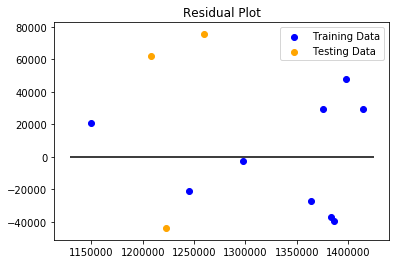

In [10]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


In [11]:
y_train.shape

(9,)

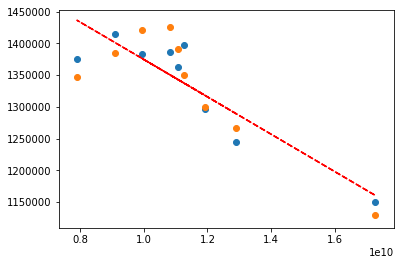

In [12]:
plt.scatter(X_train['California'], model.predict(X_train))
plt.scatter(X_train['California'], y_train)

z = np.polyfit(X_train['California'], y_train, 1)
p = np.poly1d(z)
plt.plot(X_train['California'],p(X_train['California']),"r--")
# plt.legend(['Texas with Neighboring States Louisiana, Oklahoma'])
# plt.savefig("TX_with_LA_OK.png", dpi=100,loc='upper right')